<a href="https://colab.research.google.com/github/Kumarisimran626/Airline_Passenger_Referral_Prediction/blob/main/S_K_Airline_Passenger_Referral_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Airline Passenger Refferal Prediction</u></b>


#<b/>Project Type - Classification</b>


#<b/>Contribution - Individual</b>

### <b/>Name - Simran Kumari</b>

#<b/>Project Summary -</b>

###<b/>Feature Description</b>

* airline: Name of the airline.

* overall: Overall point is given to the trip between 1 to 10.

* author: Author of the trip

* reviewdate: Date of the Review

* customer review: Review of the customers in free text format

* aircraft: Type of the aircraft

* traveller type: Type of traveler (e.g. business, leisure)

* cabin: Cabin at the flight

* date flown: Flight date

* seat comfort: Rated between 1-5

* cabin service: Rated between 1-5

* food bev: Rated between 1-5

* entertainment: Rated between 1-5

* ground service: Rated between 1-5

* value for money: Rated between 1-5

#<b/>GitHub Link-

# <b/>Problem Statement-</b>

## **Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

#<b/>Objective</b>

#<b/>Let's Begin!</b>

# <b> <u>Importing Essential libraries</u></b>


In [1]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#<b/>Dataset Loading</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airline_df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

#<b/>Exploring the data</b>

### <b/>First View of Dataset</b>

In [4]:
#Top 10 rows of the dataset
airline_df.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [5]:
#Last 5 rows of the dataset
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
#Number of rows and column
airline_df.shape

(131895, 17)

## **There are total 131895 rows 17 columns.**

In [7]:
# Column name of dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
#Dataset information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [9]:
#Checking the unique values of the recommended column(target variable)
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [10]:
# Checking the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

#**Duplicate values**

In [11]:
#counting  number of duplicated values
airline_df.duplicated().sum()

70711

In [12]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [13]:
airline_df.duplicated().sum()

0

# **Null Values**

From the last 5 rows, we can conclude that the dataset contains null values. Let's check the number of null values present for each of the columns of this huge dataset.

In [14]:
#Checking the null value count for each column
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [15]:
#Overall discription of data
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


#**Exploratory Data Analysis And Visualization**

__1)Which Traveller_type has more ratings?__


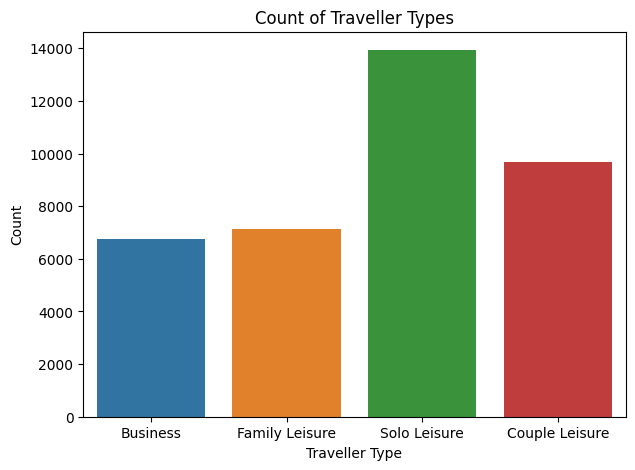

In [16]:
# Set the figure size
plt.figure(figsize=(7, 5))
sns.countplot(data=airline_df, x='traveller_type')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.title('Count of Traveller Types')
plt.show()


###-**Travelling type of Solo Leisure has more ratings**
### **-Solo type of travellers are more in number compared to other types.This can be even backed by the fact that majority of the people around the world travel alone.**

###**2) Which cabin type has overall service ratings?**

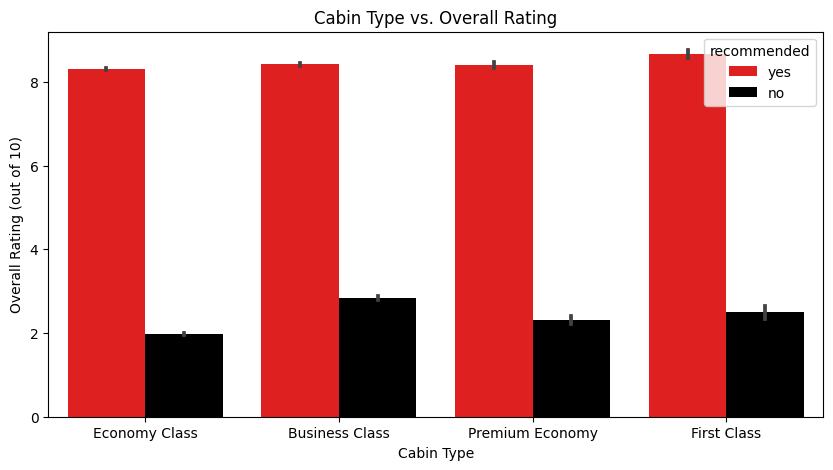

In [17]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10, 5))
sns.barplot(data=airline_df, x='cabin', y='overall', hue='recommended', palette=['red', 'black'])
plt.xlabel('Cabin Type')
plt.ylabel('Overall Rating (out of 10)')
plt.title('Cabin Type vs. Overall Rating')
plt.show()



* If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.
    
* If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.



##**3)Which airline made highest trips?**

In [18]:
# Get the number of trips each airline make.
trip_by_airlines = airline_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

### **Getting more visualized view of top 10 airlines trip through graph.**

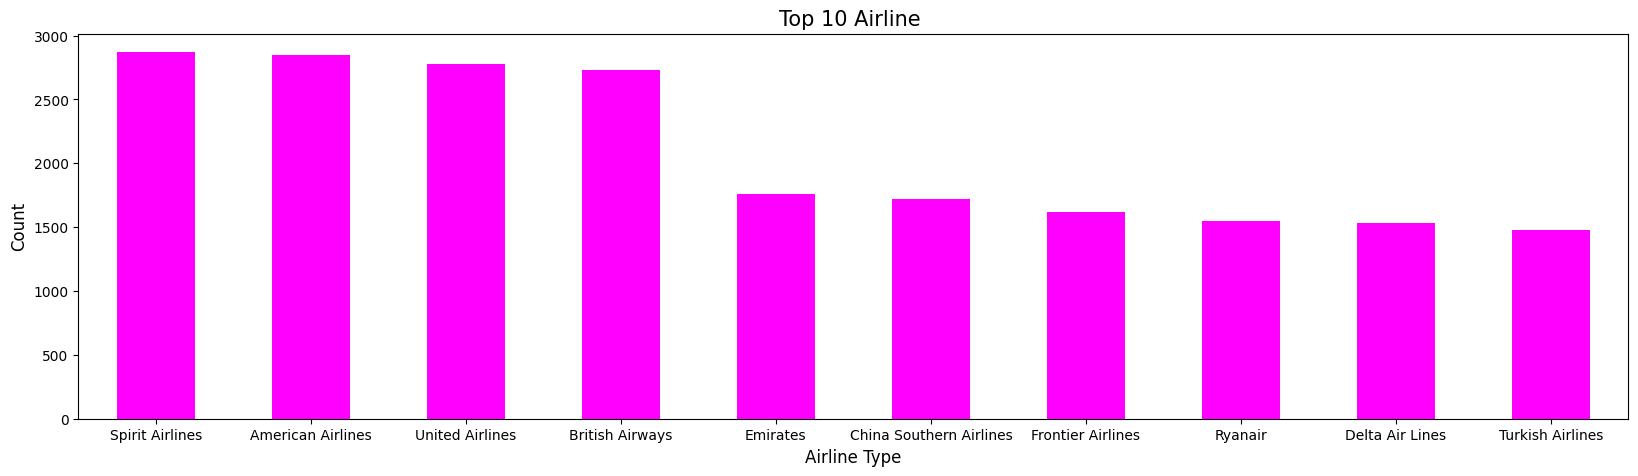

In [19]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'magenta')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 10 airlines with most trips are-1)Spirit Airlines,2) American Airlines,3)United Airlines,4) British Airways,5) Emirates,6)china southern airline,7)frontier airlines,8)ryanair,9) delta air lines,10)turkish airlines

###**4) Which type of Cabin has more recommendation?**


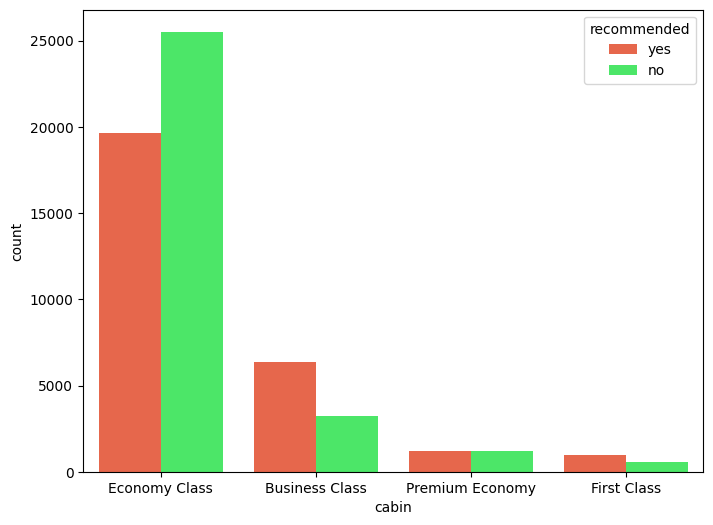

In [20]:
#setting the figure size and plotting the graph
color = ["#FF5733", "#33FF57", "#3357FF"]
plt.figure(figsize=(8, 6))
sns.countplot(data=airline_df, x='cabin', hue='recommended', palette=color)
plt.show()


On the basis of graph -

* Economy class has highest recommendation with bad reviews.

* Business class has second most recommended cabin type with good reviews.

* premium economy has equal reviews.

* first class is least recommend cabin type with good reviews.

## **5)How does the 'value for money' rating vary across different traveler types?**

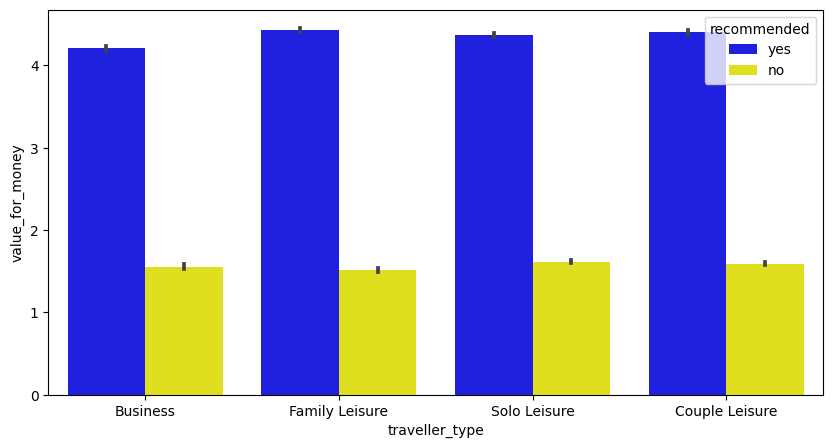

In [21]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10, 5))
sns.barplot(data=airline_df, x='traveller_type', y='value_for_money', hue='recommended', palette=['blue', 'yellow'])
plt.show()




* When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.

* Economy class is the most recommended cabin type, whereas business class is the least recommended one


###**6) What are the number of Aircraft at each type?**

In [22]:
# Get the number of aircrafts of each type
top_n_aircraft_type = airline_df['aircraft'].value_counts()
top_n_aircraft_type

A320                         2130
A380                         1109
Boeing 777                   1101
Boeing 737-800               1021
A330                          974
                             ... 
Boeing 777-200 / 757-300        1
CRJ-700 (and others)            1
Crj200                          1
Embraer, Boeing 777 / 787       1
boeing 767                      1
Name: aircraft, Length: 2088, dtype: int64

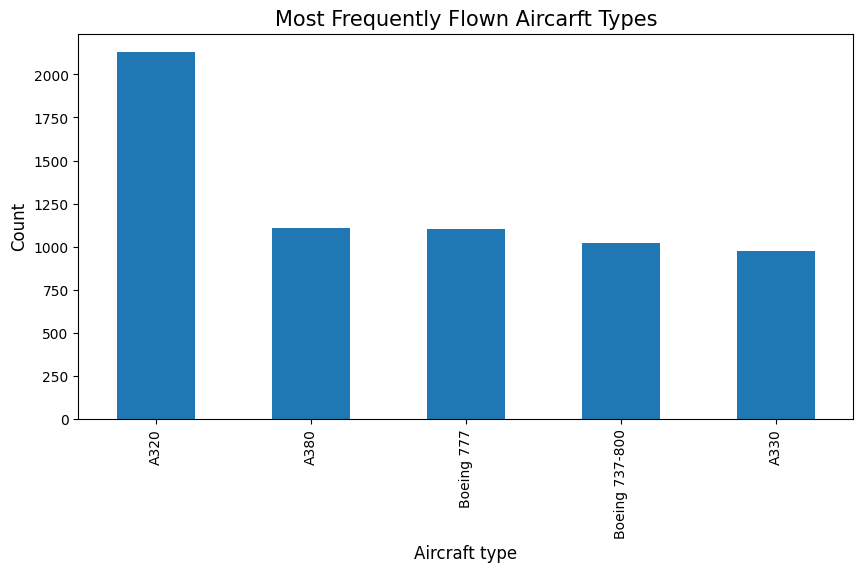

In [23]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(10,5))
top_n_aircraft_type[:5].plot(kind='bar')
plt.xlabel('Aircraft type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Most Frequently Flown Aircarft Types',fontsize=15)
plt.show()

# **Here, we inspected that their are top 5 types of aircrafts, who has tripped the most. And the aircrafts are-**

1) A320

2)  A380

3) Boeing 777

4) Boeing 737-800

5) A330

**Amid, all aircraft A320 has done highest number of trip because most of the airline prefer this type of aircraft due to it's  medium passenger capacity and low operational cost.**

###**7) How do all of the independent variables/features compare with each other?**

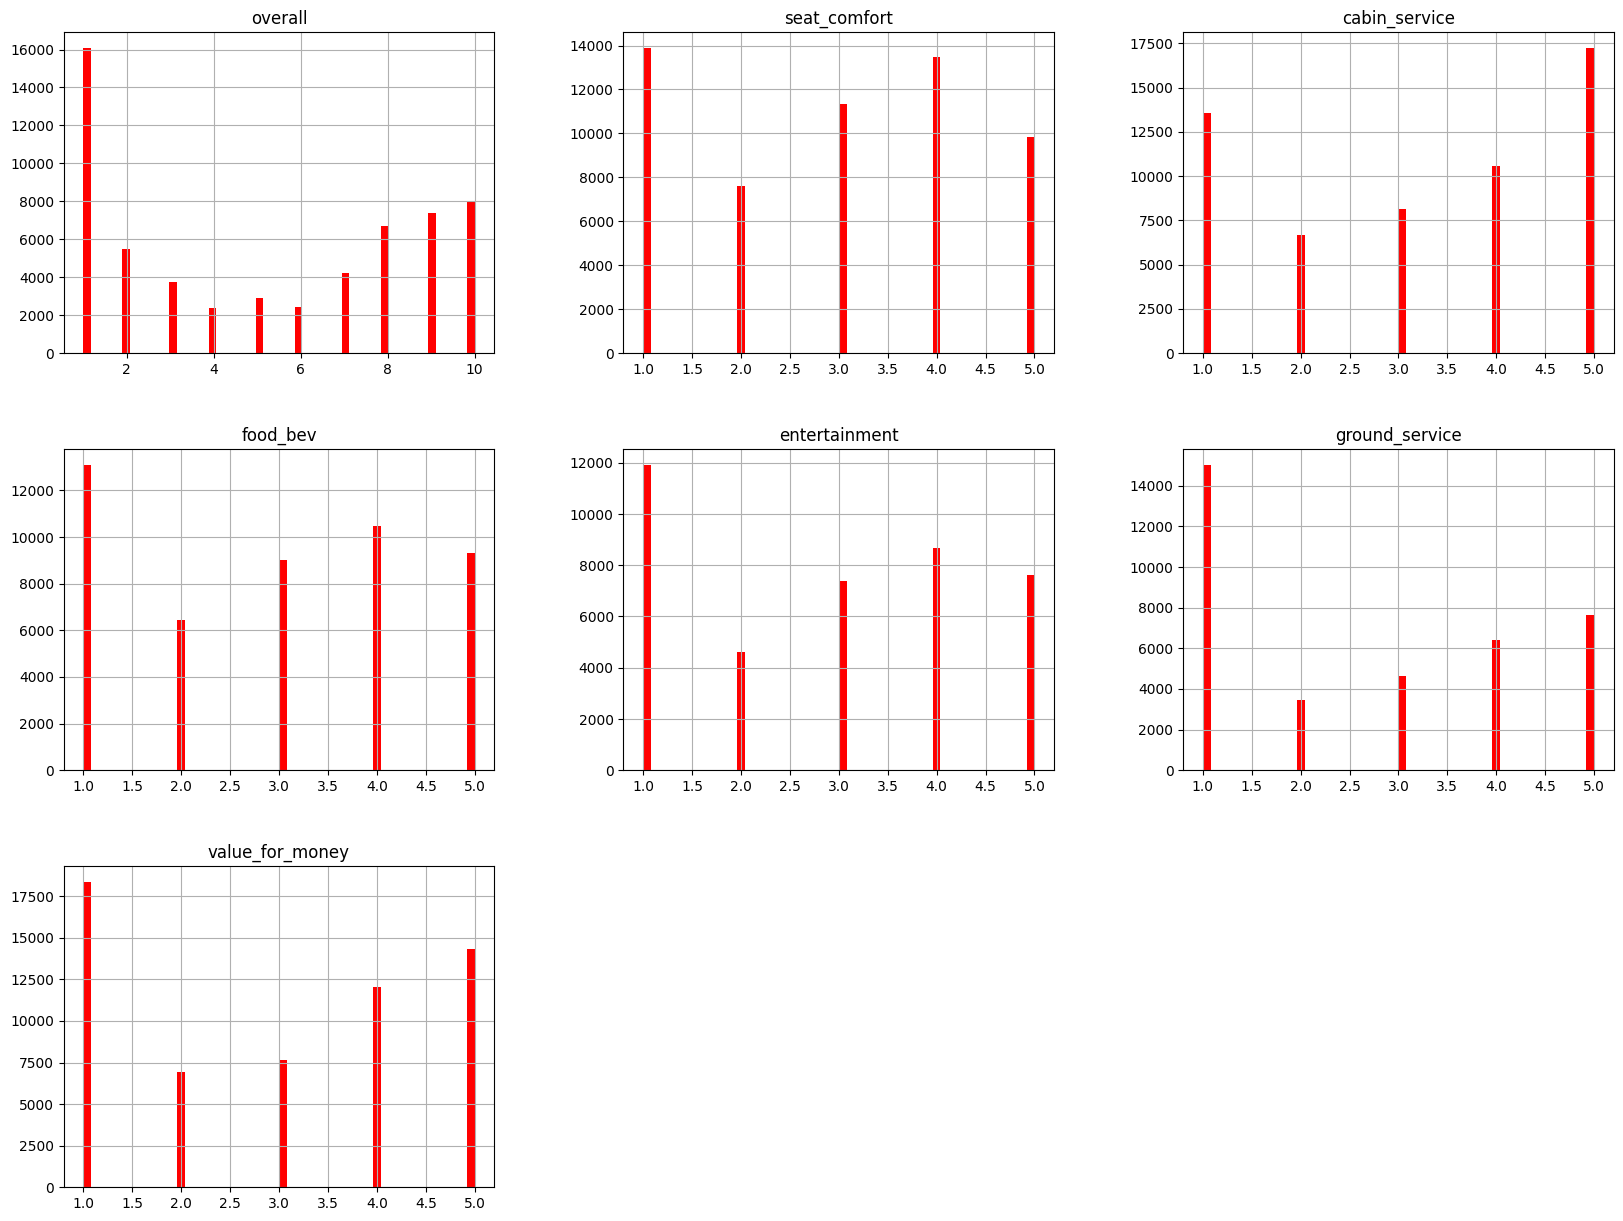

In [24]:
#frequency distribution  using histogram
airline_df.hist(bins=50, figsize=(20,15), color = 'red')
plt.show()

Based on the histogram plot.

- We can see that the overall feature ratings of 1 to 2 are the most frequent. The Seat comfort feature has the highest number of ratings of 1, followed by rataings of 4.

- The cabin service feature has the highest number of ratings of 5, followed by ratings of 1.

- For the food bev feature, the ratings of 2,4 and 5 are approximately equally frequent. This means that passengers have varying opinions on the quality of  food and beverages provided by the airline.


- In the terms of the Entertainment and Ground service features, the ratings of 3 are the most frequent, followed by ratings of 1.

- From the value for money feature, we can see that most passengers give ratings of 1, indicating that airline does not provide good value for money.

#<b/>Feature Engineering</b>

###<b/>Droping Unnecessary columns</b>

In [25]:
# Sorting the missing value Percentage wise
def missing_values(df):
# Calculate the percentage of missing values for each column
  missing_percentage = (airline_df.isnull().sum() / len(df)) * 100
# Create a DataFrame to store the missing value percentages
  missing_values_df = pd.DataFrame({'Column_name' : airline_df.columns,
                                    'missing_percentage' : missing_percentage})
# Sort the DataFrame by missing percentage in descending order
  return missing_values_df.sort_values('missing_percentage', ascending = False)

In [26]:
# Checking the missing values percentage wise
missing_values(airline_df)

,Column_name,missing_percentage
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [27]:
# Showing the unique aircraft names
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [28]:
# No. of unique aircraft
airline_df.aircraft.nunique()


2088

**Droping the aircraft column from dataset because it contains a large number of missing values.**



In [29]:
# Droping the aircraft column
airline_df = airline_df.drop(['aircraft'], axis = 1)

In [30]:
# Droping unnecessary column from data
airline_df = airline_df.drop(['author', 'review_date', 'route', 'date_flown', 'customer_review'], axis = 1)

In [31]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


###<b/>The Reason behind removing this column was -</b>

- author : In this categorical column have high variability and this is not required in prediction purpose.

- review_date : It is similar to date_flown, it's not required.

- date_flown : It's not a time series data, and there have some common time periods between two dates, that's why not needed for modeling.

- route : It is independent of the services and quality of travels, so this is not needed for modeling.

-  customer_review : This column belongs to general feature review and it is unessential.



###<b/>Based on null value percentage we divided our data in two parts -</b>

- low_null  : A column that contain low percentage of null values.

- high_null : A column that contain high percentage of values.

In [32]:
# Seperating the Numerical column
low_null_values = ['overall', 'seat_comfort',	'cabin_service', 'value_for_money']
high_null_values = ['food_bev',	'entertainment',	'ground_service']

In [33]:
#  Quantile-1 using as imputational technique
def quantile1(df,column):
  Q1 = np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1, inplace = True)

In [34]:
# Looping the null value
for col in low_null_values:
  quantile1(airline_df,col)

- Here, we implemented null values to Quantile-1, for low null value percentage in columns.

In [35]:
# Median using as imputation technique
def median(df,column):
  df[column].fillna(df[column].median(), inplace=True)



In [36]:
for col in high_null_values:
  median(airline_df,col)


- Here, we implemented null values to median, for high null value percentage in columns.

In [37]:
airline_df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


- <b/>traveller type, cabin, recommended have null values that we left.</b>

In [38]:
# Droping the recommended null value column
airline_df.dropna(subset=['recommended'], inplace=True)

In [39]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [40]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

- filling traveller type column with forward fill method

- filling cabin with mode method


In [41]:
airline_df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no


In [42]:
# Checking the null percentage
missing_values(airline_df)

,Column_name,missing_percentage
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [43]:
airline_df.shape

(59761, 11)

**Now our dataset is clean, dataset cleaning is ensuring the step that the data is accurate, consistent, and free of errors, when your data is incorrect or inconsistent data can negatively impact the performance of the ML model.**

**Cleaning data is crucial step, when your data is cleaned the model performances is enhanced.**

#<b/>Label Encoding

Converting the target variable as categorical to numerical.

In [44]:
#Converting the target column
airline_df['recommended'].replace({'yes':1, 'no':0},inplace=True)

In [45]:
airline_df.head(4)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1


#<b/>Coorelation Plot</b>

<Axes: >

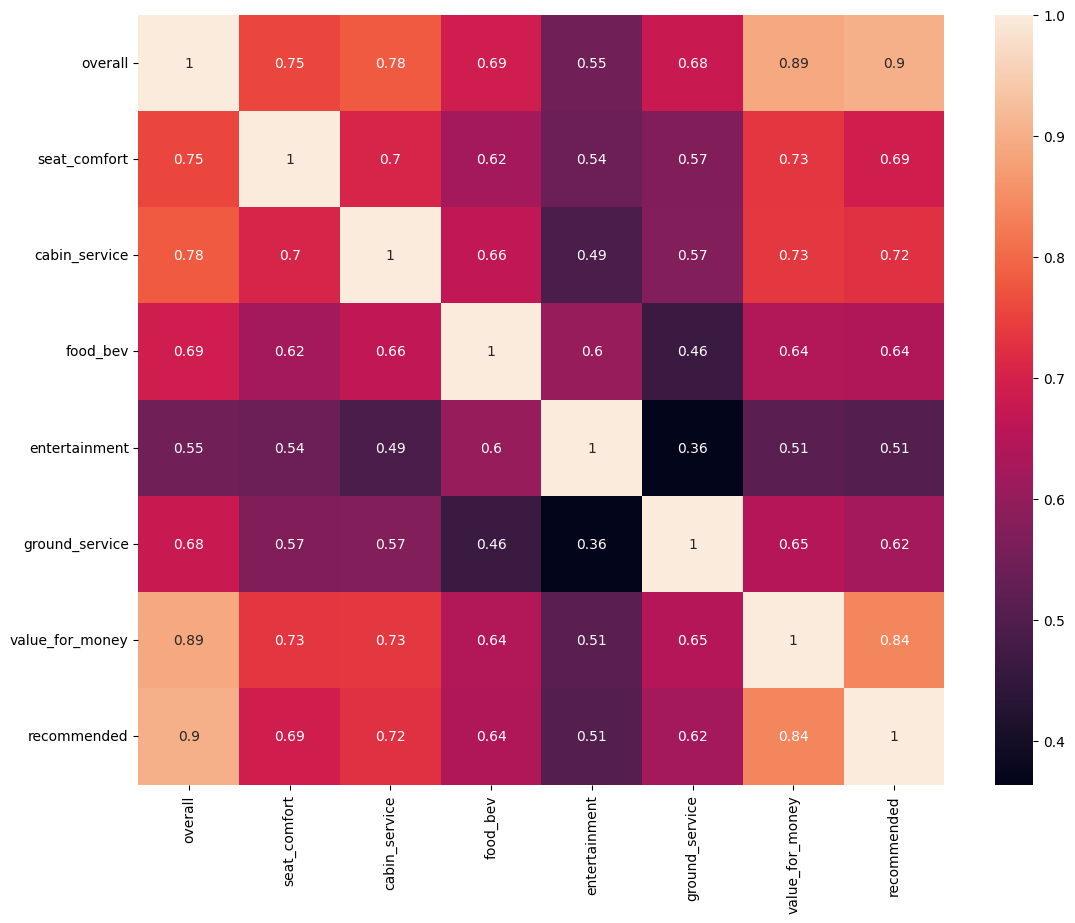

In [46]:
plt.figure(figsize=(13,10))
sns.heatmap(airline_df.corr(), annot=True)

**Remove the "Overall" column from the dataset because it demonstrate the higest coorelation with other features, which causes to multicollinearity during prediction.**

In [47]:
# Generating a function to remove multicollinearity
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [48]:
cal_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended', 'value_for_money', 'overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [49]:
# droping "overall" column
airline_df.drop(["overall"], axis=1, inplace=True)

In [50]:
# droping "airline" column
airline_df.drop(["airline"], axis=1, inplace=True)

* **Here we removed "overall" and "airline" column from our dataset because it not needed for further analysis or modeling.**

###<b/>Describing dependent and independent variables.</b>

In [51]:
# Splitting the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

In [52]:
#independent variables
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

#<b/>One Hot Encoding</b>

In [53]:
x = pd.get_dummies(x)

In [54]:
x.shape

(59761, 14)

In [55]:
x.head(4)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,2.0,1,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,5.0,0,0,0,1,0,1,0,0


In [56]:
print("The percentage of No lables of Target Variable is", np.round(y.value_counts()[0]/len(y)*100))
print("The percentage of Yes labels of Target Variable is", np.round(y.value_counts()[1]/len(y)*100))

The percentage of No lables of Target Variable is 52.0
The percentage of Yes labels of Target Variable is 48.0


- **The percentage of both label ('yes' and 'no') is almost same, here is not need  to use any class imbalance handling.**

#<b/>Splitting Data into Train and Test</b>

In [57]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y ,  test_size = 0.2, random_state = 42)

In [58]:
# shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [59]:
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


#<b/>ML- Model Implementation</b>

# <b/>1) Logistic Regression</b>

In [60]:
# Fitting the logistic regression
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [61]:
# Model coefficients
lr.coef_

array([[ 0.29470524,  0.54964494,  0.43522642,  0.24880929,  0.72092498,
         1.63381309,  0.15000711, -0.04985052, -0.15934752,  0.06655806,
         0.14922398, -0.06516326,  0.11367346, -0.19036704]])

In [62]:
# Intercept value
lr.intercept_

array([-11.84300155])

In [63]:
# Train and Test score
print(f'Train score= {round(lr.score(x_train,y_train), 4)}')
print(f'Test score= {round(lr.score(x_test,y_test), 4)}')

Train score= 0.939
Test score= 0.9324


In [64]:
#  test data
np.array (y_test )

array([0, 0, 1, ..., 1, 1, 1])

In [65]:
# predicted test data
y_pred = lr.predict(x_test)

y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [66]:
#evaluation matrix or report of logistic regression
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



- **93% accuracy in logistic regression.**